# Pacman simulation

# 1. Data simulation

In [1]:
from numpy.random import choice, normal
import statsmodels.formula.api as smf
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

random.seed(1234)

n = 100

distance = choice([0, 0.5, 1], n)
price = 10 - 3*distance + normal(loc=0, scale=.5, size=n)
customers = 30 - 2*price - 10*distance + normal(loc=0, scale=2, size=n)

df = pd.DataFrame({'price': price, 'distance': distance, 'customers': customers})

# 2. Impact of price

Running a linear regression

In [2]:
smf.ols(formula='customers ~ price', data=df).fit().summary()

Notes: [1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

We see that the coefficient of the price is positive, which shouldn’t be
like this (we know for sure that it should be -2)

If we plot the data, we see that there is a positive trend of the price
into the number of customers, so it is not a problem of the linear
regression.

<Axes: xlabel='price', ylabel='customers'>

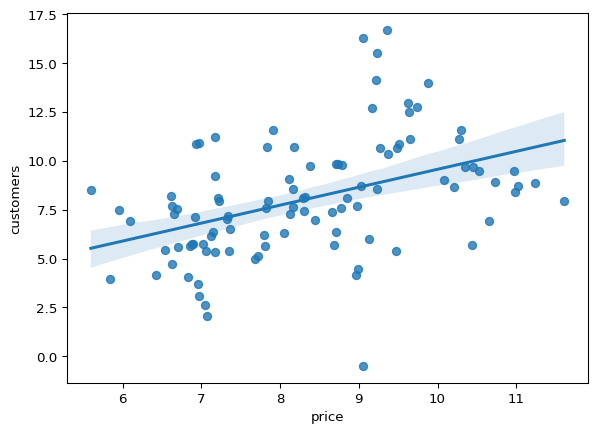

In [3]:
sns.regplot(x = 'price', y = 'customers', data=df)

If we plot the data including the distance we can see that the distance
is acting as a confounder

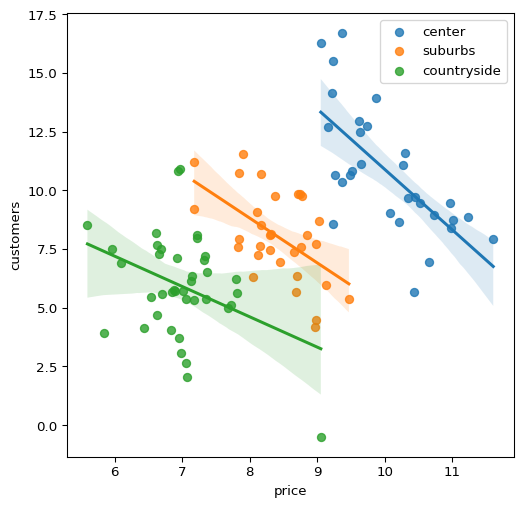

In [4]:
fig, ax = plt.subplots(figsize=(6, 6))

df_0 = df[df['distance'] == 0.0]
df_05 = df[df['distance'] == 0.5]
df_1 = df[df['distance'] == 1.0]

sns.regplot(x = 'price', y = 'customers', data=df_0, ax=ax, label='center')
sns.regplot(x = 'price', y = 'customers', data=df_05, ax=ax, label='suburbs')
sns.regplot(x = 'price', y = 'customers', data=df_1, ax=ax, label='countryside')
ax.legend()
plt.show()

Now we include the distance into the regression and we see that the
coefficient of price is close to the real coefficient.

In [5]:
smf.ols(formula='customers ~ price + distance', data=df).fit().summary()

Notes: [1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

# 3. Impact of distance

When we are interested in measuring the total effect, since the distance
has no confounders, we can directly run the regression

In [6]:
smf.ols(formula='customers ~ distance', data=df).fit().summary()

Notes: [1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

Obtaining a coefficient of the distance that is close to the -4 that it
is expected to be